In [2]:
%matplotlib inline
import pandas as pd
from plotnine import *
from sklearn.linear_model import LinearRegression

In [24]:
df = pd.read_csv("CSV Files/birds.csv")

In [25]:
df1 = df.loc[df["Mol_sex"] != "U"] # from lecture
df1 = df1.rename(columns = {"Mol_sex" : "sex"}) # from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
df1 = df1.drop(columns={"Beh_sex"}) # from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
df2 = df.dropna(subset=["Beh_sex"]) # from lecture
df2 = df2.rename(columns = {"Beh_sex" : "sex"})
df2 = df2.drop(columns={"Mol_sex"})
bird_data = df2.append(df1) # from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
bird_data

,Gen_loc,Date,Reference,Spec_loc,Lat,Long,Culmen,Headbill,Tarsus,Wing,Age,sex,Behavior,Band_ID,P10stage
0,Alaska,6/8/1994,Lanctot,Prudhoe_Bay,70.2144,-148.2683,18.6,47.9,33.4,135.0,AHY,M,DISP,12702,old
1,Alaska,6/9/1994,Lanctot,Prudhoe_Bay,70.2144,-148.2683,19.2,48.5,32.9,139.0,AHY,M,DISP,12703,old
2,Alaska,6/11/1994,Lanctot,Prudhoe_Bay,70.2144,-148.2683,18.5,44.5,29.9,132.0,AHY,F,EGG,12706,old
3,Alaska,6/11/1994,Lanctot,Prudhoe_Bay,70.2144,-148.2683,18.3,43.8,28.8,130.0,AHY,F,EGG,12707,old
4,Alaska,6/12/1994,Lanctot,Prudhoe_Bay,70.2144,-148.2683,19.4,47.9,31.0,136.0,AHY,M,DISP,12709,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Brazil,1/11/2005,Almeida,Lpeixe,-31.2500,-50.9667,19.6,45.2,30.6,120.0,HY,F,NaN,383,old
358,Brazil,1/11/2005,Almeida,Lpeixe,-31.2500,-50.9667,18.6,44.6,35.0,133.0,AHY,F,NaN,384,old
359,Brazil,1/12/2005,Almeida,Lpeixe,-31.2500,-50.9667,20.6,46.3,30.0,132.0,AHY,F,NaN,385,old
360,Brazil,1/12/2005,Almeida,Lpeixe,-31.2500,-50.9667,19.9,46.3,29.9,132.0,AHY,F,NaN,386,grow


This data consists of a single table morphologic measurement data and sex as determined by behavior 
and genetic techniques from 362 Buff-breasted Sandpipers (Calidris subruficollis) from Brazil, Texas and Alaska (1994 - 2017).
    
https://alaska.usgs.gov/products/data.php?dataid=302

Data was collected by Lanctot, R. B., Almeida, J. B. and Tibbitts, T. L.

## 1. To start I wanted to check if there were any major differences in body type between the two sexes regardless of where they were born.

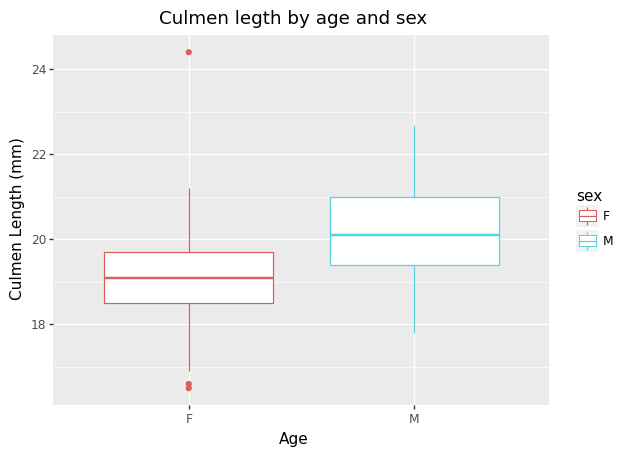

<ggplot: (159715045259)>

In [32]:
bird_data = bird_data.dropna(subset=["Culmen"])
ggplot(bird_data, aes(x = "sex", y = 'Culmen', color = "sex")) + geom_boxplot()\
+ xlab("Age") + ylab("Culmen Length (mm)") + ggtitle("Culmen legth by age and sex")

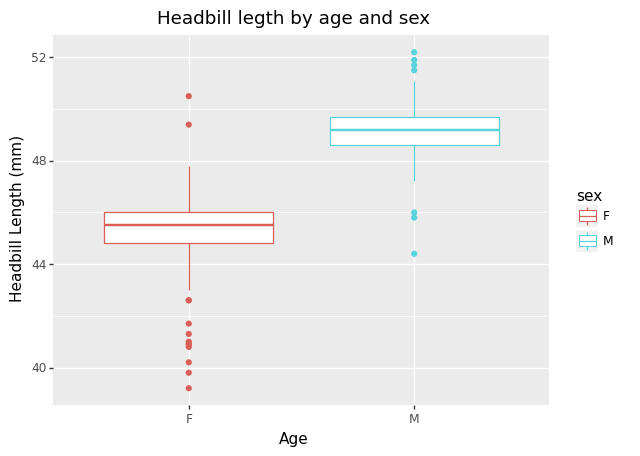

<ggplot: (159715970145)>

In [34]:
ggplot(bird_data, aes(x = "sex", y = 'Headbill', color = "sex")) + geom_boxplot()\
+ xlab("Age") + ylab("Headbill Length (mm)") + ggtitle("Headbill legth by age and sex")

Many if not all physical attributes are different between the sexes, with males always being larger than the females. 

## 1a. Next I wanted to check if there was any relationship between the body sizes potentially for evolutionary purposes.

C:\Users\thoop\anaconda3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_jitter : Removed 3 rows containing missing values.
C:\Users\thoop\anaconda3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


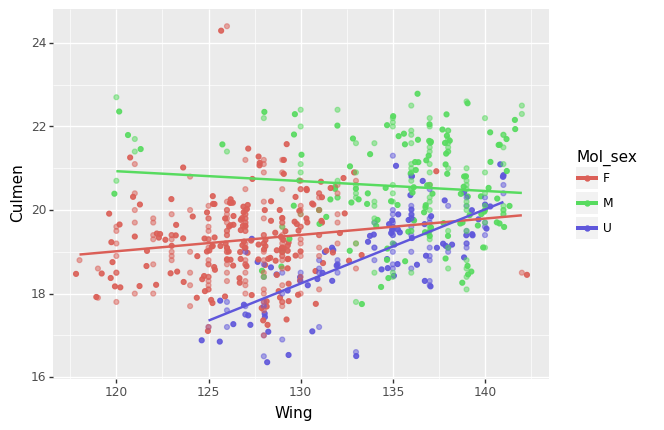

<ggplot: (82267733676)>

In [91]:
ggplot(bird_data, aes(x="Wing", y="Culmen", color="sex")) \
+ geom_jitter(alpha=0.9) \
+ geom_point(alpha=0.5) + geom_smooth(se=False, method="lm")

Between the two sexes the Male is on average larger than the female, but the graph shows that for females as wing length increases the culmen tends to increase but with males it is the opposite. As the wing length increases the culmen tends to be slightly shorter than males with shorter wing lengths. There is a slight trend in how Wing length of a bird might indicate how other parts of it's body grow with it.

## 2. Next I wanted to check if there were any major differences between body size depending on the specific location the bird was found

C:\Users\thoop\anaconda3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.
C:\Users\thoop\anaconda3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


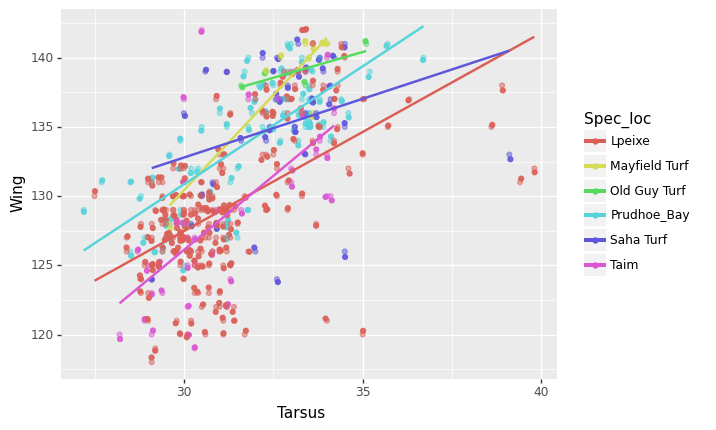

<ggplot: (82268600775)>

In [90]:
ggplot(bird_data, aes(x="Tarsus", y="Wing", color="Spec_loc")) \
+ geom_jitter(alpha=0.9) \
+ geom_point(alpha=0.5) + geom_smooth(se=False, method="lm")

The graph shows a general upward trend between Tarsus size and Wing length, however certain areas are prone to having very high wing lengths within a short range of tarsus sizes like Old Guy Turf. Taim shows the opposite version of that having relatively low sizes for both tarsus and wing length on average. Those areas may require more specific sets of body types to be able to live in those environments.

## 2a. I also wanted to be more broad and see if there were any general differences between parts of the bird based on general location. Specifically wing length.

C:\Users\thoop\anaconda3\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.


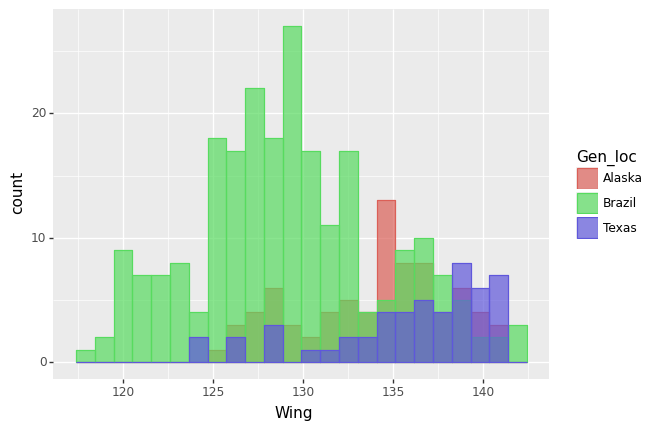

<ggplot: (82267642597)>

In [114]:
ggplot(bird_data, aes(x="Wing", fill="Gen_loc", color="Gen_loc")) \
+ geom_histogram(bins=24, position="identity", alpha=0.7)

The graph shows the wing lengths of the birds seperated by general location. This shows the different average lengths of the wing spans depending on where the bird was recorded. Texas for instance has the highest average wing length for the birds whereas Brazil, despite having birds that have long wing lengths, on average have the lowest wing lengths among the other locations. This could have to do with the frequency in which birds need to fly in those locations like Alaska and Texas compared to Brazil.

## 3. Lastly to see if there were any major differences in body type based on age of the bird.

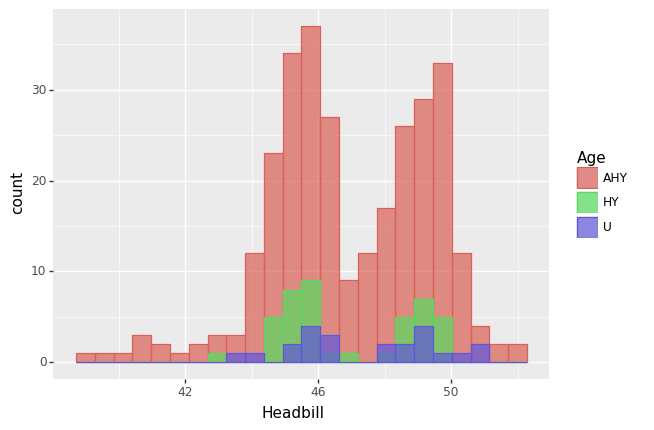

<ggplot: (82267422961)>

In [117]:
ggplot(bird_data, aes(x="Headbill", fill="Age", color="Age")) \
+ geom_histogram(bins=24, position="identity", alpha=0.7)

The graph shows that the recorded ages barely plays a role in the size of the bird, in almost all data points the distribution is the same for all the age groups which wasn't what I was expecting as usually age plays a larger role in data like this when it comes to body size. It seems as though these birds reach maturity very early on, only needing a year before their body stops large growth changes and doesn't grow much more if at all.
C

## CONCLUSION: 
These specific types of birds are seperated in size by sex, however age plays barely any role. In most cases a male will be larger than a female bird of this species regardless of it's age as long as it's age is in the the categories graphed. ALso these birds may have slightly differnt body proportions depending on where they grew up with certain things such as wing and body size being different on average between the areas recorded. However most of the differences found in the body types of the different birds culminated from their sex as the differences were more noticeable than some of the other's found in this dataset.